# A demo to pyCircle (version 0.1)

> Enjoy😉~


In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.markers import MarkerStyle

In [2]:
# Remember to decompress the files below
file_anchors_simple = "./data/MCscan_JCVI/bed-format/Bmor.Dmel.anchors.simple"
file_bed_1 = "./data/MCscan_JCVI/bed-format/Bmor.bed"
file_bed_2 = "./data/MCscan_JCVI/bed-format/Dmel.bed"
file_chromosomes_length_sp1 = "./data/chr_len.Bmor.ordered.tsv"
file_chromosomes_length_sp2 = "./data/chr_len.Dmel.ordered.tsv"
file_linkinfo = "./data/linkinfo-CYP450.tsv"
file_genomic_labels_inner = "./data/genomic_labels-CYP450.Bmor.tsv"
file_genomic_labels_outer = "./data/genomic_labels-CYP450.Dmel.tsv"

prefix = "./output/pyCircle"

chromosomes_head_tail_distance = np.radians(20.0)
chromosomes_separation = np.radians(1.0)

chromosomes_width_sp1 = 5.0
chromosomes_width_sp2 = 5.0
bottom_sp1 = 50.0
bottom_sp2 = 80.0


y_genomic_labels_outer = bottom_sp2 + chromosomes_width_sp2
ytext_genomic_labels_outer = bottom_sp2 + chromosomes_width_sp2 + 10.0
y_genomic_labels_inner = bottom_sp1
ytext_genomic_labels_inner = bottom_sp1 -10.0



In [3]:
def parse_anchors_simple(file_anchors_simple):

    df_anchors_simple = pd.read_csv(
        file_anchors_simple,
        header=None,
        sep="\t",
    )

    df_bed_sp1 = pd.read_csv(
        file_bed_1,
        header=None,
        sep="\t",
    )

    df_bed_sp2 = pd.read_csv(
        file_bed_2,
        header=None,
        sep="\t",
    )

    df_linkinfo = pd.DataFrame(
        columns=[
            "chromosome_1",
            "chr_1_start",
            "chr_1_end",
            "chromosome_2",
            "chr_2_start",
            "chr_2_end",
            "orientation",
        ],
    )

    for i_0, r_0 in df_anchors_simple.iterrows():
        block_1_s = r_0[0]
        block_1_e = r_0[1]
        block_2_s = r_0[2]
        block_2_e = r_0[3]
        strain = r_0[5]

        new_row = {
            "orientation": strain,
        }

        for i_1, r_1 in df_bed_sp1.iterrows():
            bed_chr = r_1[0]
            bed_start = r_1[1]
            bed_end = r_1[2]
            bed_name = r_1[3]
            # bed_strain = r_1[5]

            if bed_name == block_1_s:
                new_row["chromosome_1"] = bed_chr
                new_row["chr_1_start"] = bed_start

            if bed_name == block_1_e:
                new_row["chr_1_end"] = bed_end

        for i_2, r_2 in df_bed_sp2.iterrows():
            bed_chr = r_2[0]
            bed_start = r_2[1]
            bed_end = r_2[2]
            bed_name = r_2[3]
            # bed_strain = r_2[5]

            if block_2_s == bed_name:
                new_row["chromosome_2"] = bed_chr
                new_row["chr_2_start"] = bed_start

            if block_2_e == bed_name:
                new_row["chr_2_end"] = bed_end

        df_linkinfo.loc[i_0] = [
            new_row["chromosome_1"],
            new_row["chr_1_start"],
            new_row["chr_1_end"],
            new_row["chromosome_2"],
            new_row["chr_2_start"],
            new_row["chr_2_end"],
            new_row["orientation"],
        ]

        new_row.clear()
    return df_linkinfo


df_linkinfo = parse_anchors_simple(file_anchors_simple)

df_linkinfo

,chromosome_1,chr_1_start,chr_1_end,chromosome_2,chr_2_start,chr_2_end,orientation
0,Bmor_Chr_1,127169,143755,Dmel_Chr_3L,9413595,9419932,-
1,Bmor_Chr_1,2565121,2586075,Dmel_Chr_3L,19818173,19829523,+
2,Bmor_Chr_1,7005607,7364414,Dmel_Chr_3L,12537512,12710249,+
3,Bmor_Chr_1,15946184,15979620,Dmel_Chr_3L,8905917,8912154,-
4,Bmor_Chr_1,15888750,15942466,Dmel_Chr_4,853556,867025,+
...,...,...,...,...,...,...,...
79,Bmor_Chr_8,7370234,7422599,Dmel_Chr_X,15876367,15887311,-
80,Bmor_Chr_8,15921093,16025165,Dmel_Chr_X,6533998,6589173,-
81,Bmor_Chr_8,16025305,16034312,Dmel_Chr_X,21624795,21630148,+
82,Bmor_Chr_9,14700379,15214208,Dmel_Chr_2L,13835563,13923553,+


In [4]:

def parse_chromosome_lengths(chromosomes_length_file):
    df_chr_lengths = pd.read_csv(
        chromosomes_length_file,
        sep="\t",
        header=None,
        index_col=0,
        names=["chromosome", "length"],
    )
    return df_chr_lengths


df_chr_lengths_sp1 = parse_chromosome_lengths(file_chromosomes_length_sp1)
df_chr_lengths_sp2 = parse_chromosome_lengths(file_chromosomes_length_sp2)

In [5]:
count_chromosomes_sp1 = df_chr_lengths_sp1.shape[0]
count_chromosomes_sp2 = df_chr_lengths_sp2.shape[0]

chromosomes_names_sp1 = df_chr_lengths_sp1.index
chromosomes_names_sp2 = df_chr_lengths_sp2.index

chromosomes_length_sp1 = df_chr_lengths_sp1["length"]
chromosomes_length_sp2 = df_chr_lengths_sp2["length"]


chromosomes_radian_sp1 = (
    chromosomes_length_sp1
    / np.sum(chromosomes_length_sp1)
    * (2 * np.pi - chromosomes_head_tail_distance)
)
chromosomes_radian_sp2 = (
    chromosomes_length_sp2
    / np.sum(chromosomes_length_sp2)
    * (2 * np.pi - chromosomes_head_tail_distance)
)

adjusted_x_start_radian_sp1 = (
    np.cumsum(chromosomes_radian_sp1) - chromosomes_radian_sp1 + chromosomes_head_tail_distance / 2
)
adjusted_x_start_radian_sp2 = (
    np.cumsum(chromosomes_radian_sp2) - chromosomes_radian_sp2 + chromosomes_head_tail_distance / 2
)


In [6]:
df_adjusted_linkinfo = pd.DataFrame(
    columns=[
        "chromosome_1",
        "chr_1_start_radian",
        "chr_1_end_radian",
        "chromosome_2",
        "chr_2_start_radian",
        "chr_2_end_radian",
        "orientation",
    ],
)


for i_0, r_0 in df_linkinfo.iterrows():
    for i_1 in chromosomes_radian_sp1.index:
        if r_0["chromosome_1"] == i_1:
            df_adjusted_linkinfo.loc[i_0, "chromosome_1"] = i_1
            x_start_radian_1 = (
                r_0["chr_1_start"]
                / chromosomes_length_sp1[i_1]
                * (chromosomes_radian_sp1[i_1] - chromosomes_separation)
            )
            adjusted_x_start_radian_1 = (
                adjusted_x_start_radian_sp1[i_1] + x_start_radian_1
            )
            x_end_radian_1 = (
                r_0["chr_1_end"]
                / chromosomes_length_sp1[i_1]
                * (chromosomes_radian_sp1[i_1] - chromosomes_separation)
            )
            adjusted_x_end_radian_1 = adjusted_x_start_radian_sp1[i_1] + x_end_radian_1
            df_adjusted_linkinfo.loc[i_0, "chr_1_start_radian"] = (
                adjusted_x_start_radian_1
            )
            df_adjusted_linkinfo.loc[i_0, "chr_1_end_radian"] = adjusted_x_end_radian_1
    for i_2 in chromosomes_radian_sp2.index:
        if r_0["chromosome_2"] == i_2:
            df_adjusted_linkinfo.loc[i_0, "chromosome_2"] = i_2
            x_start_radian_2 = (
                r_0["chr_2_start"]
                / chromosomes_length_sp2[i_2]
                * (chromosomes_radian_sp2[i_2] - chromosomes_separation)
            )
            adjusted_x_start_radian_2 = (
                adjusted_x_start_radian_sp2[i_2] + x_start_radian_2
            )
            x_end_radian_2 = (
                r_0["chr_2_end"]
                / chromosomes_length_sp2[i_2]
                * (chromosomes_radian_sp2[i_2] - chromosomes_separation)
            )
            adjusted_x_end_radian_2 = adjusted_x_start_radian_sp2[i_2] + x_end_radian_2
            df_adjusted_linkinfo.loc[i_0, "chr_2_start_radian"] = (
                adjusted_x_start_radian_2
            )
            df_adjusted_linkinfo.loc[i_0, "chr_2_end_radian"] = adjusted_x_end_radian_2
    df_adjusted_linkinfo.loc[i_0, "orientation"] = r_0["orientation"]

df_adjusted_linkinfo

,chromosome_1,chr_1_start_radian,chr_1_end_radian,chromosome_2,chr_2_start_radian,chr_2_end_radian,orientation
0,Bmor_Chr_1,3.848216,3.848415,Dmel_Chr_3L,3.695843,3.696112,-
1,Bmor_Chr_1,3.877499,3.87775,Dmel_Chr_3L,4.138259,4.138742,+
2,Bmor_Chr_1,3.930835,3.935144,Dmel_Chr_3L,3.828676,3.836021,+
3,Bmor_Chr_1,4.038222,4.038624,Dmel_Chr_3L,3.674256,3.674521,-
4,Bmor_Chr_1,4.037532,4.038177,Dmel_Chr_4,5.918047,5.918454,+
...,...,...,...,...,...,...,...
79,Bmor_Chr_8,2.231091,2.231708,Dmel_Chr_X,0.847704,0.848168,-
80,Bmor_Chr_8,2.331846,2.333072,Dmel_Chr_X,0.45158,0.453919,-
81,Bmor_Chr_8,2.333074,2.33318,Dmel_Chr_X,1.091442,1.091669,+
82,Bmor_Chr_9,1.855835,1.861909,Dmel_Chr_2L,1.776825,1.780556,+


In [7]:
df_linkinfo_gene = pd.read_csv(
    file_linkinfo,
    # "./data/linkinfo-family_0.test-edging.tsv",
    sep="\t",
    header=0,
)


df_adjusted_linkinfo_gene = pd.DataFrame(
    columns=[
        "chromosome_1",
        "chr_1_start_radian",
        "chromosome_2",
        "chr_2_start_radian",
        "plot_parameters",
    ],
)

for i_0, r_0 in df_linkinfo_gene.iterrows():
    for i_1 in chromosomes_radian_sp1.index:
        if r_0["chromosome_1"] == i_1:
            df_adjusted_linkinfo_gene.loc[i_0, "chromosome_1"] = i_1
            x_start_radian_1 = (
                r_0["chr_1_start"]
                / chromosomes_length_sp1[i_1]
                * (chromosomes_radian_sp1[i_1] - chromosomes_separation)
            )
            adjusted_x_start_radian_1 = (
                adjusted_x_start_radian_sp1[i_1] + x_start_radian_1
            )
            df_adjusted_linkinfo_gene.loc[i_0, "chr_1_start_radian"] = (
                adjusted_x_start_radian_1
            )
    for i_2 in chromosomes_radian_sp2.index:
        if r_0["chromosome_2"] == i_2:
            df_adjusted_linkinfo_gene.loc[i_0, "chromosome_2"] = i_2
            x_start_radian_2 = (
                r_0["chr_2_start"]
                / chromosomes_length_sp2[i_2]
                * (chromosomes_radian_sp2[i_2] - chromosomes_separation)
            )
            adjusted_x_start_radian_2 = (
                adjusted_x_start_radian_sp2[i_2] + x_start_radian_2
            )
            df_adjusted_linkinfo_gene.loc[i_0, "chr_2_start_radian"] = (
                adjusted_x_start_radian_2
            )
    df_adjusted_linkinfo_gene.loc[i_0, "plot_parameters"] = r_0["plot_parameters"]

df_adjusted_linkinfo_gene["plot_parameters"] = df_adjusted_linkinfo_gene[
    "plot_parameters"
].apply(json.loads)

df_adjusted_linkinfo_gene

,chromosome_1,chr_1_start_radian,chromosome_2,chr_2_start_radian,plot_parameters
0,Bmor_Chr_1,3.936244,Dmel_Chr_3L,4.138053,"{'alpha': 0.8, 'color': '#de1c31', 'linestyle'..."
1,Bmor_Chr_17,0.977884,Dmel_Chr_2R,2.749823,"{'alpha': 0.8, 'color': '#5a191b', 'linestyle'..."
2,Bmor_Chr_17,0.977884,Dmel_Chr_3R,5.036472,"{'alpha': 0.8, 'color': '#5a191b', 'linestyle'..."
3,Bmor_Chr_17,0.977884,Dmel_Chr_3R,5.036775,"{'alpha': 0.8, 'color': '#5a191b', 'linestyle'..."
4,Bmor_Chr_13,0.302342,Dmel_Chr_X,0.194433,"{'alpha': 0.8, 'color': '#de1c31', 'linestyle'..."
5,Bmor_Chr_13,0.302342,Dmel_Chr_X,0.661431,"{'alpha': 0.8, 'color': '#de1c31', 'linestyle'..."
6,Bmor_Chr_7,3.748284,Dmel_Chr_2R,2.837297,"{'alpha': 0.8, 'color': '#5a191b', 'linestyle'..."


In [8]:
def parse_genomic_labels(file_genomic_labels):
    df_genomic_labels = pd.read_csv(
        file_genomic_labels,
        sep="\t",
        header=0,
    )
    df_genomic_labels["fill_parameters"] = df_genomic_labels["fill_parameters"].apply(
        json.loads
    )
    df_genomic_labels["text_parameters"] = df_genomic_labels["text_parameters"].apply(
        json.loads
    )
    return df_genomic_labels


df_genomic_labels_outer = parse_genomic_labels(file_genomic_labels_outer)
df_genomic_labels_inner = parse_genomic_labels(file_genomic_labels_inner)

df_adjusted_genomic_labels_outer = pd.DataFrame(
    columns=[
        "chr",
        "rad_start",
        "rad_end",
        "delta_rad_end",
        "adjusted_rad_end",
        "delta_adjusted_rad_end",
        # "r_end",
        # "adjusted_r_end",
        # "delta_adjusted_r_end",
        "annotation",
        "text_parameters",
    ],
)

df_adjusted_genomic_labels_inner = df_adjusted_genomic_labels_outer.copy(deep=True)


def fill_df_adjusted_genomic_labels(
    df_genomic_labels_,
    chromosomes_length_sp_,
    chromosomes_radian_sp_,
    adjusted_x_start_radian_sp_,
    df_adjusted_genomic_labels_,
):
    for i_0, r_0 in df_genomic_labels_.iterrows():
        chromosome = r_0["chromosome"]
        x_start_radian = (
            r_0["start"]
            / chromosomes_length_sp_[chromosome]
            * (chromosomes_radian_sp_[chromosome] - chromosomes_separation)
        )
        adjusted_x_start_radian = (
            adjusted_x_start_radian_sp_[chromosome] + x_start_radian
        )
        df_adjusted_genomic_labels_.loc[
            i_0,
            [
                "chr",
                "rad_start",
                "rad_end",
                # "r_end",
                "annotation",
                "fill_parameters",
                "text_parameters",
            ],
        ] = [
            chromosome,
            adjusted_x_start_radian,
            adjusted_x_start_radian,
            # ytext_genomic_labels_outer,
            r_0["annotation"],
            r_0["fill_parameters"],
            r_0["text_parameters"],
        ]


fill_df_adjusted_genomic_labels(
    df_genomic_labels_=df_genomic_labels_inner,
    chromosomes_length_sp_=chromosomes_length_sp1,
    chromosomes_radian_sp_=chromosomes_radian_sp1,
    adjusted_x_start_radian_sp_=adjusted_x_start_radian_sp1,
    df_adjusted_genomic_labels_=df_adjusted_genomic_labels_inner,
)

fill_df_adjusted_genomic_labels(
    df_genomic_labels_=df_genomic_labels_outer,
    chromosomes_length_sp_=chromosomes_length_sp2,
    chromosomes_radian_sp_=chromosomes_radian_sp2,
    adjusted_x_start_radian_sp_=adjusted_x_start_radian_sp2,
    df_adjusted_genomic_labels_=df_adjusted_genomic_labels_outer,
)


def prepare_df_adjusted_genomic_labels(df_adjusted_genomic_labels_):
    df_adjusted_genomic_labels_.sort_values(
        by=["rad_start", "annotation"],
        ignore_index=True,
        inplace=True,
    )

    # .fillna(0)
    df_adjusted_genomic_labels_["delta_rad_end"] = df_adjusted_genomic_labels_[
        "rad_start"
    ] - df_adjusted_genomic_labels_["rad_start"].shift(1)
    df_adjusted_genomic_labels_["adjusted_rad_end"] = df_adjusted_genomic_labels_[
        "rad_end"
    ]
    df_adjusted_genomic_labels_["delta_adjusted_rad_end"] = df_adjusted_genomic_labels_[
        "adjusted_rad_end"
    ] - df_adjusted_genomic_labels_["rad_start"].shift(1)


prepare_df_adjusted_genomic_labels(df_adjusted_genomic_labels_outer)
prepare_df_adjusted_genomic_labels(df_adjusted_genomic_labels_inner)


def sort_adjusted_rad_end(df):
    df.sort_values(
        by=["adjusted_rad_end", "rad_start", "annotation"],
        ignore_index=True,
        inplace=True,
    )


def sort_rad_start(df):
    df.sort_values(
        by=["rad_start", "adjusted_rad_end", "annotation"],
        ignore_index=True,
        inplace=True,
    )


def re_cal_delta_adjusted_rad_end(df):
    df["delta_adjusted_rad_end"] = df["adjusted_rad_end"] - df[
        "adjusted_rad_end"
    ].shift(1)


def find_consecutive_groups(
    series,
    df_adjusted_genomic_labels_,
    min_delta_rad_end_,
):
    # Find consecutive groups
    consecutive_groups = []
    current_group = [series.index[0] - 1, series.index[0]]
    for i in range(1, series.index.size):
        if series.index[i] == series.index[i - 1] + 1:
            current_group.append(series.index[i])
        else:
            consecutive_groups.append(current_group)
            current_group = [series.index[i] - 1, series.index[i]]
    consecutive_groups.append(current_group)
    # Merge groups if they meet criteria
    new_consecutive_groups = []
    new_current_group = consecutive_groups[0]
    for i in range(1, len(consecutive_groups)):
        group_0 = df_adjusted_genomic_labels_.loc[
            consecutive_groups[i - 1], "adjusted_rad_end"
        ]
        group_1 = df_adjusted_genomic_labels_.loc[
            consecutive_groups[i], "adjusted_rad_end"
        ]
        range_offset_0 = min_delta_rad_end_ * (
            group_0.size // 2 - 0.5 if group_0.size % 2 == 0 else group_0.size // 2
        )
        range_offset_1 = min_delta_rad_end_ * (
            group_1.size // 2 - 0.5 if group_1.size % 2 == 0 else group_1.size // 2
        )
        # new_values_0
        if (
            0 <= group_0.mean() - range_offset_0
            and group_0.mean() + range_offset_0 < 2 * np.pi
        ):
            new_values_0 = np.linspace(
                group_0.mean() - range_offset_0,
                group_0.mean() + range_offset_0,
                group_0.size,
            )
        elif group_0.mean() - range_offset_0 < 0.0:
            new_values_0 = np.linspace(
                0,
                0 + 2 * range_offset_0,
                group_0.size,
            )
        elif 2 * np.pi <= group_0.mean() + range_offset_0:
            new_values_0 = np.linspace(
                2 * np.pi - 2 * range_offset_0,
                2 * np.pi,
                group_0.size,
                endpoint=False,
            )
        # new_values_1
        if (
            0.0 <= group_1.mean() - range_offset_1
            and group_1.mean() + range_offset_1 < 2 * np.pi
        ):
            new_values_1 = np.linspace(
                group_1.mean() - range_offset_1,
                group_1.mean() + range_offset_1,
                group_1.size,
            )
        elif 2 * np.pi <= group_1.mean() + range_offset_1:
            new_values_1 = np.linspace(
                2 * np.pi - 2 * range_offset_1,
                2 * np.pi,
                group_1.size,
                endpoint=False,
            )
        elif group_1.mean() - range_offset_1 < 0.0:
            new_values_1 = np.linspace(
                0,
                0 + 2 * range_offset_1,
                group_1.size,
            )
        # Merge?
        if new_values_1[0] - new_values_0[-1] < min_delta_rad_end_:
            new_current_group += consecutive_groups[i]
        else:
            new_consecutive_groups.append(new_current_group)
            new_current_group = consecutive_groups[i]
    # Add the last group
    new_consecutive_groups.append(new_current_group)
    # This is very important
    sort_rad_start(df_adjusted_genomic_labels_)
    re_cal_delta_adjusted_rad_end(
        df_adjusted_genomic_labels_,
    )
    return new_consecutive_groups


def prevent_overlap(
    max_iter: 1000,
    df_genomic_labels_,
    min_delta_rad_end_,
    df_adjusted_genomic_labels_,
):
    """
    If max_iter is reached yet labels still overlap, re-executed this function to further refine and rearrange the results from the previous iteration.
    """
    iter_count = 0
    check_while = list()
    check_while_count = 0

    # Initialize a Boolean mask to mark which rows have met the conditions
    mask_satisfied = np.ones(df_adjusted_genomic_labels_.shape[0], dtype=bool)

    while iter_count < max_iter:
        if 2 * np.pi < df_genomic_labels_.shape[0] * min_delta_rad_end_:
            print(
                f"min_delta_rad_end is too large. Total degree is {df_genomic_labels_.shape[0] * np.degrees(min_delta_rad_end_)}."
            )
            break
        if (
            min_delta_rad_end_
            <= df_adjusted_genomic_labels_["delta_adjusted_rad_end"][
                mask_satisfied
            ]  # .iloc[1:]
        ).all():
            print(
                f"Stop, iter_count = {iter_count}. Separations between genomicLabels are large enough."
            )
            break
        selected_rows = df_adjusted_genomic_labels_[
            mask_satisfied
            & (
                df_adjusted_genomic_labels_["delta_adjusted_rad_end"]
                < min_delta_rad_end_
            )
        ]["delta_adjusted_rad_end"]
        if not selected_rows.empty:
            if len(check_while) < 2:
                check_while.append(frozenset(selected_rows.index))
            else:
                if frozenset(selected_rows.index) == check_while[0]:
                    print(
                        f"Stop, iter_count = {iter_count}. Separations between genomicLabels won't change obviously."
                    )
                    break
                else:
                    check_while.pop(0)
                    check_while.append(frozenset(selected_rows.index))
                    check_while_count += 1
            consecutive_groups = find_consecutive_groups(
                selected_rows,
                df_adjusted_genomic_labels_,
                min_delta_rad_end_,
            )
            for indexes in consecutive_groups:
                selected_group = df_adjusted_genomic_labels_.loc[
                    indexes, "adjusted_rad_end"
                ]
                range_offset = min_delta_rad_end_ * (
                    selected_group.count() // 2 - 0.5
                    if selected_group.count() % 2 == 0
                    else selected_group.count() // 2
                )
                if (
                    0.0 <= selected_group.mean() - range_offset
                    and selected_group.mean() + range_offset < 2 * np.pi
                ):
                    df_adjusted_genomic_labels_.loc[indexes, "adjusted_rad_end"] = (
                        np.linspace(
                            selected_group.mean() - range_offset,
                            selected_group.mean() + range_offset,
                            selected_group.count(),
                        )
                    )
                elif selected_group.mean() - range_offset < 0.0:
                    df_adjusted_genomic_labels_.loc[indexes, "adjusted_rad_end"] = (
                        np.linspace(
                            0,
                            0 + 2 * range_offset,
                            selected_group.count(),
                        )
                    )
                elif 2 * np.pi <= selected_group.mean() + range_offset:
                    df_adjusted_genomic_labels_.loc[indexes, "adjusted_rad_end"] = (
                        np.linspace(
                            2 * np.pi - 2 * range_offset,
                            2 * np.pi,
                            selected_group.count(),
                            endpoint=False,
                        )
                    )
            sort_adjusted_rad_end(df_adjusted_genomic_labels_)
            re_cal_delta_adjusted_rad_end(df_adjusted_genomic_labels_)
            # Update the mask to mark which rows now meet the conditions
            mask_satisfied[selected_rows.index] = False
        else:
            mask_satisfied = np.ones(df_adjusted_genomic_labels_.shape[0], dtype=bool)
        iter_count += 1

In [14]:
# re-executed this code block, I'll see the difference, `iter_count` should stop at 593 -> 4 ...
prevent_overlap(
    max_iter=1000,
    df_genomic_labels_=df_genomic_labels_outer,
    min_delta_rad_end_=np.radians(1.8),
    df_adjusted_genomic_labels_=df_adjusted_genomic_labels_outer,
)

df_adjusted_genomic_labels_outer

Stop, iter_count = 4. Separations between genomicLabels won't change obviously.


,chr,rad_start,rad_end,delta_rad_end,adjusted_rad_end,delta_adjusted_rad_end,annotation,text_parameters,fill_parameters
0,Dmel_Chr_X,0.194433,0.194433,NaN,0.189435,NaN,Cyp4g1,"{'color': '#de1c31', 'fontdict': {'size': 11.0...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
1,Dmel_Chr_X,0.266211,0.266211,0.071778,0.220851,0.031416,Cyp4d1,"{'color': '#f27635', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
2,Dmel_Chr_X,0.266768,0.266768,0.000557,0.252267,0.031416,Cyp4d14,"{'color': '#f27635', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
3,Dmel_Chr_X,0.266913,0.266913,0.000145,0.283683,0.031416,Cyp4d2,"{'color': '#f27635', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
4,Dmel_Chr_X,0.267009,0.267009,0.000096,0.315099,0.031416,Cyp4ae1,"{'color': '#f27635', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
...,...,...,...,...,...,...,...,...,...
83,Dmel_Chr_3R,5.323403,5.323403,0.196447,5.307747,0.120346,Cyp12a5,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#c45a65', 'linestyle'..."
84,Dmel_Chr_3R,5.323507,5.323507,0.000104,5.339163,0.031416,Cyp12a4,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#c45a65', 'linestyle'..."
85,Dmel_Chr_3R,5.475291,5.475291,0.151784,5.475291,0.136128,Cyp6d4,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
86,Dmel_Chr_3R,5.679021,5.679021,0.20373,5.679021,0.20373,Cyp6a18,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."


In [17]:
# re-executed this code block, I'll see the difference, `iter_count` should stop at 19 -> 6 -> 3 ...
prevent_overlap(
    max_iter=1000,
    df_genomic_labels_=df_genomic_labels_inner,
    min_delta_rad_end_=np.radians(3.6),
    df_adjusted_genomic_labels_=df_adjusted_genomic_labels_inner,
)

df_adjusted_genomic_labels_inner

Stop, iter_count = 3. Separations between genomicLabels won't change obviously.


,chr,rad_start,rad_end,delta_rad_end,adjusted_rad_end,delta_adjusted_rad_end,annotation,text_parameters,fill_parameters
0,Bmor_Chr_13,0.227544,0.227544,NaN,0.227544,NaN,Cyp4l6,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
1,Bmor_Chr_13,0.302342,0.302342,0.074798,0.302342,0.074798,Cyp4g25,"{'color': '#de1c31', 'fontdict': {'size': 11.0...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
2,Bmor_Chr_18,0.526896,0.526896,0.224553,0.526896,0.224553,Cyp339a1,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
3,Bmor_Chr_16,0.720351,0.720351,0.193456,0.611751,0.084855,CYP367A1,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
4,Bmor_Chr_16,0.757326,0.757326,0.036975,0.674583,0.062832,Cyp6ae7,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
5,Bmor_Chr_16,0.75803,0.75803,0.000704,0.737415,0.062832,Cyp6ae2,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
6,Bmor_Chr_16,0.758152,0.758152,0.000122,0.800246,0.062832,cyp6a8,"{'color': '#310f1b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
7,Bmor_Chr_17,0.977884,0.977884,0.219732,0.863078,0.062832,Cyp9g3,"{'color': '#f2481b', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
8,Bmor_Chr_17,0.984582,0.984582,0.006698,0.92591,0.062832,Cyp9a20,"{'color': '#f27635', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."
9,Bmor_Chr_17,0.984806,0.984806,0.000224,0.988742,0.062832,Cyp9a19,"{'color': '#f27635', 'fontdict': {'size': 8.0,...","{'alpha': 0.5, 'color': '#737c7b', 'linestyle'..."


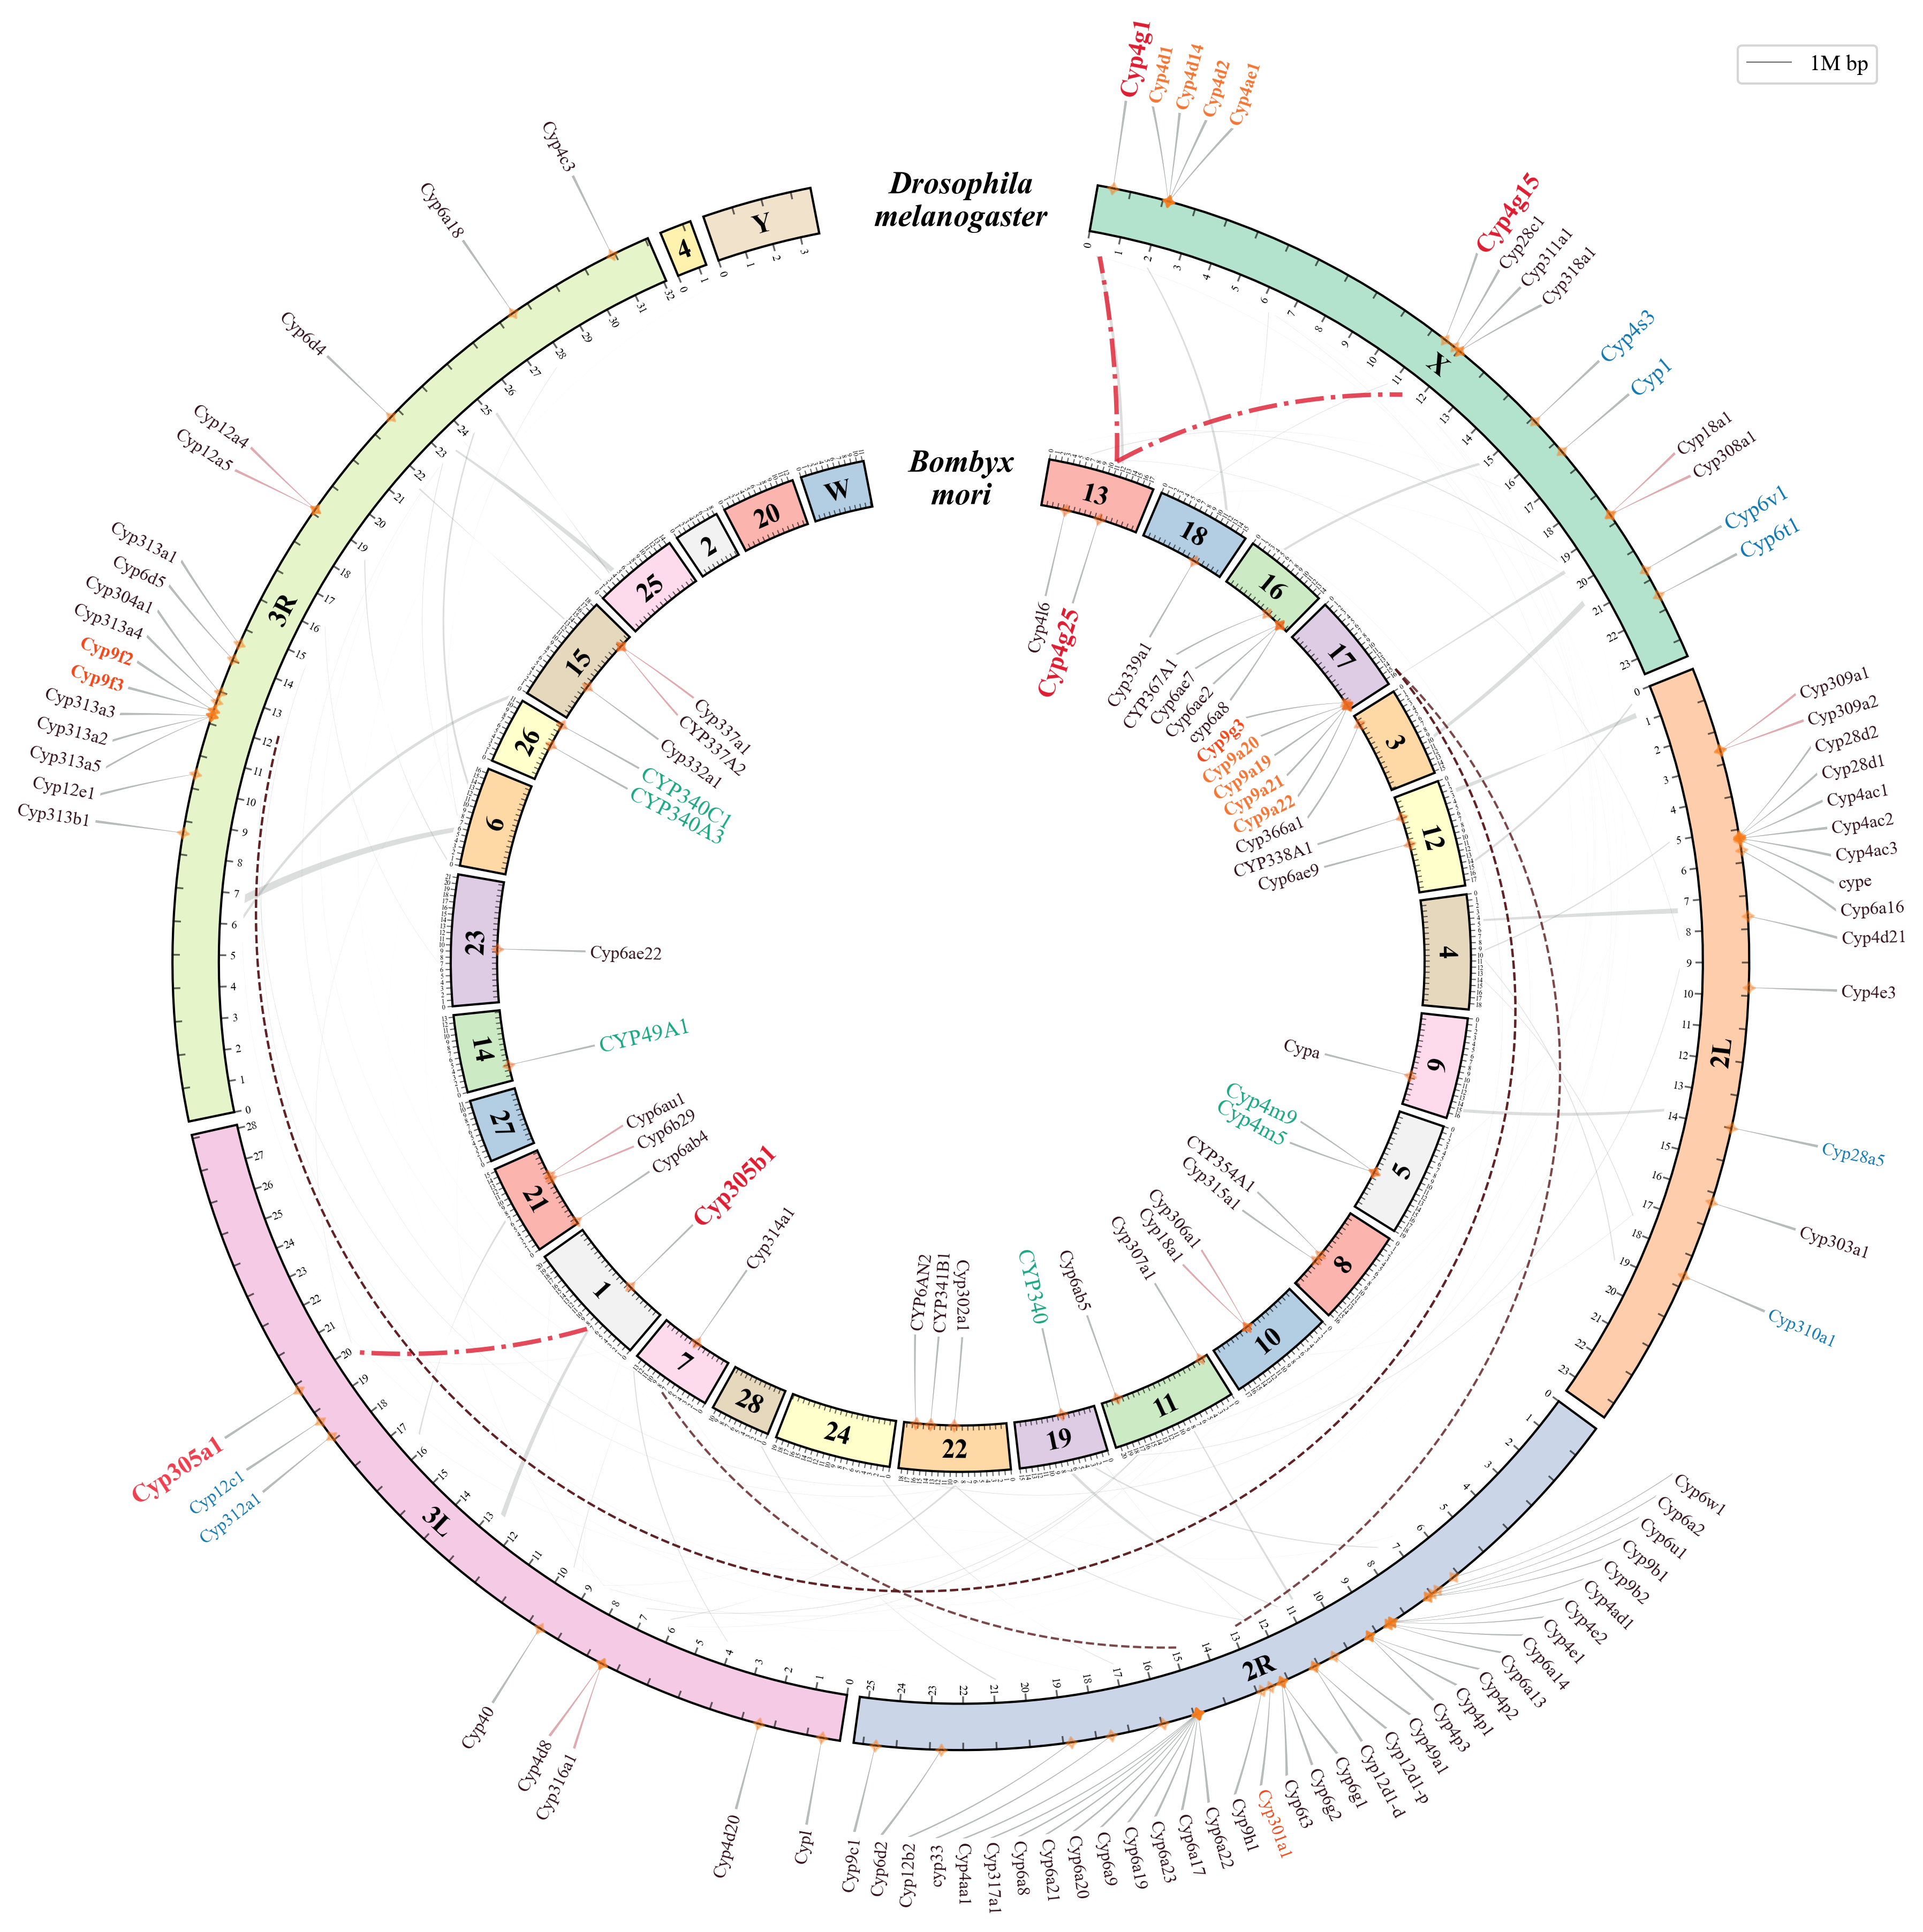

In [18]:
fig = plt.figure(
    figsize=(15, 15),
    dpi=300,
)

plt.rcParams["font.family"] = ["serif"]
plt.rcParams["font.serif"] = ["Times New Roman"]

chromosomes_colors_sp1 = plt.cm.Pastel1.colors[:count_chromosomes_sp1]
chromosomes_colors_sp2 = plt.cm.Pastel2.colors[:count_chromosomes_sp2]
# colormap_sp2 = plt.get_cmap('prism')
# values_sp2 = np.linspace(0, 1, count_chromosomes_sp2)
# chromosomes_colors_sp2 = [colormap_sp2(value) for value in values_sp2]

ax_chromosomes = fig.add_subplot(projection="polar")
ax_chromosomes.set_axis_off()
ax_chromosomes.set_theta_direction(-1)
ax_chromosomes.set_theta_zero_location("N")
ax_chromosomes.set_rlim(0.0, 100.0)


chromosomes_bars_sp1 = ax_chromosomes.bar(
    x=adjusted_x_start_radian_sp1,
    height=chromosomes_width_sp1,
    width=chromosomes_radian_sp1 - chromosomes_separation,
    bottom=bottom_sp1,
    align="edge",
    color=chromosomes_colors_sp1,
    edgecolor="black",
    linewidth=1.0,
    label="Bombyx mori",
)

chromosomes_bars_sp2 = ax_chromosomes.bar(
    x=adjusted_x_start_radian_sp2,
    height=chromosomes_width_sp2,
    width=chromosomes_radian_sp2 - chromosomes_separation,
    bottom=bottom_sp2,
    align="edge",
    color=chromosomes_colors_sp2,
    edgecolor="black",
    linewidth=1.0,
    label="Drosophila melanogaster",
)

# ax_chromosomes.legend(
#     prop={
#         "style": "italic",
#     },
# )


def adjust_rotation(degree, vertical=False):
    mod_angle = (90 - degree) % 360
    if vertical:
        if 0 <= mod_angle < 180:
            adjusted_degree = degree
        elif 180 <= mod_angle < 360:
            adjusted_degree = degree - 180
        else:
            return adjusted_degree
    else:
        if 0 <= mod_angle < 90:
            adjusted_degree = degree - 90
        elif 90 <= mod_angle < 180:
            adjusted_degree = degree + 90
        elif 180 <= mod_angle < 270:
            adjusted_degree = degree + 90
        elif 270 <= mod_angle < 360:
            adjusted_degree = degree - 90
        else:
            return adjusted_degree
    return adjusted_degree


y_chromosomes_labels_sp1 = bottom_sp1 + chromosomes_width_sp1 / 2
y_chromosomes_labels_sp2 = bottom_sp2 + chromosomes_width_sp2 / 2

ax_chromosomes_labels = fig.add_subplot(
    projection="polar",
)
ax_chromosomes_labels.set_axis_off()
ax_chromosomes_labels.set_theta_direction(-1)
ax_chromosomes_labels.set_theta_zero_location("N")
ax_chromosomes_labels.set_rlim(0.0, 100.0)


def plot_chromosomes_labels(
    count_chromosomes_,
    adjusted_x_start_radian_,
    chromosomes_radian_,
    y_chromosomes_labels_,
    chromosomes_names_,
    replace_names: tuple[str, str],
):
    for i in range(count_chromosomes_):
        radian = (
            adjusted_x_start_radian_.iloc[i]
            + (chromosomes_radian_.iloc[i] - chromosomes_separation) / 2
        )
        ax_chromosomes_labels.text(
            x=radian,
            y=y_chromosomes_labels_,
            s=chromosomes_names_[i].replace(replace_names[0], replace_names[1]),
            rotation=adjust_rotation(np.degrees(np.pi / 2 - radian)),
            rotation_mode="anchor",
            ha="center",
            va="center_baseline",
            fontsize=12.0,
            fontdict={
                "weight": "bold",
            },
        )


plot_chromosomes_labels(
    count_chromosomes_sp1,
    adjusted_x_start_radian_sp1,
    chromosomes_radian_sp1,
    y_chromosomes_labels_sp1,
    chromosomes_names_sp1,
    replace_names=("Bmor_Chr_", ""),
)

ax_chromosomes_labels.text(
    x=np.radians(0.0),
    y=y_chromosomes_labels_sp1,
    s="Bombyx\nmori",
    fontsize=14.0,
    fontdict={
        "style": "italic",
        "weight": "bold",
    },
    ha="center",
    ma="center",
    rotation=0,
    rotation_mode="anchor",
    va="center_baseline",
)

plot_chromosomes_labels(
    count_chromosomes_sp2,
    adjusted_x_start_radian_sp2,
    chromosomes_radian_sp2,
    y_chromosomes_labels_sp2,
    chromosomes_names_sp2,
    replace_names=("Dmel_Chr_", ""),
)

ax_chromosomes_labels.text(
    x=np.radians(0.0),
    y=y_chromosomes_labels_sp2,
    s="Drosophila\nmelanogaster",
    rotation=0,
    rotation_mode="anchor",
    ha="center",
    ma="center",
    va="center_baseline",
    fontsize=14.0,
    fontdict={
        "style": "italic",
        "weight": "bold",
    },
)


def plot_scales(
    df_chromosomes_,
    adjusted_x_start_radian_,
    chromosomes_radian_,
    r,
    y_chromosomes_scales_,
    unit_step: int = 1000000,
    direction="outer",
    fontsize=3.0,
    scale_height=0.5,
    scale_width=0.5,
    plot=True,
    label_name: str = "1M bp",
    text=True,
):
    ax_chromosomes_scales = fig.add_subplot(
        projection="polar",
    )
    ax_chromosomes_scales.set_axis_off()
    ax_chromosomes_scales.set_theta_direction(-1)
    ax_chromosomes_scales.set_theta_zero_location("N")
    ax_chromosomes_scales.set_rlim(0.0, 100.0)
    # direction should be outer or inner
    for chromosome, row in df_chromosomes_.iterrows():
        length = row.iloc[0]
        for site in range(length):
            if site % unit_step == 0:
                radian = adjusted_x_start_radian_[chromosome] + (site / length) * (
                    chromosomes_radian_[chromosome] - chromosomes_separation
                )
                if text == True:
                    ax_chromosomes_scales.text(
                        x=radian,
                        y=y_chromosomes_scales_,
                        s=f"{site // unit_step}",
                        rotation=adjust_rotation(
                            np.degrees(np.pi / 2 - radian), vertical=True
                        ),
                        rotation_mode="anchor",
                        ha="center",
                        va="center_baseline",
                        fontsize=fontsize,
                    )
                if plot == True:
                    if direction == "outer":
                        y = [r, r + scale_height]
                    elif direction == "inner":
                        y = [r, r - scale_height]
                    ax_chromosomes_scales.plot(
                        [radian, radian],
                        y,
                        alpha=0.6,
                        color="#000000",
                        linewidth=scale_width,
                        label=label_name,
                    )

    return ax_chromosomes_scales


ax_chromosomes_scales_sp1 = plot_scales(
    df_chr_lengths_sp1,
    adjusted_x_start_radian_sp1,
    chromosomes_radian_sp1,
    bottom_sp1 + chromosomes_width_sp1,
    bottom_sp1 + chromosomes_width_sp1 + 1.0,
    unit_step=1000000,  # 1M bp
    direction="outer",
)

plot_scales(
    df_chr_lengths_sp1,
    adjusted_x_start_radian_sp1,
    chromosomes_radian_sp1,
    bottom_sp1,
    bottom_sp1 + 1.0,
    unit_step=1000000,
    direction="outer",
    text=False,
)

ax_chromosomes_scales_sp1.legend(
    [ax_chromosomes_scales_sp1.get_lines()[0]],
    [ax_chromosomes_scales_sp1.get_lines()[0].get_label()],
)

ax_chromosomes_scales_sp2 = plot_scales(
    df_chr_lengths_sp2,
    adjusted_x_start_radian_sp2,
    chromosomes_radian_sp2,
    bottom_sp2,
    bottom_sp2 - 1.5,
    unit_step=1000000,
    direction="inner",
    fontsize=5.0,
    scale_height=0.7,
    scale_width=0.8,
)

plot_scales(
    df_chr_lengths_sp2,
    adjusted_x_start_radian_sp2,
    chromosomes_radian_sp2,
    bottom_sp2 + chromosomes_width_sp1,
    bottom_sp2 + chromosomes_width_sp1 - 1.0,
    unit_step=1000000,
    direction="inner",
    text=False,
    scale_height=0.7,
    scale_width=0.8,
)


def plot_links(
    df,
    link_r_1,
    link_r_2,
):
    ax_links = fig.add_subplot(projection="polar")
    ax_links.set_axis_off()
    ax_links.set_theta_direction(-1)
    ax_links.set_theta_zero_location("N")
    ax_links.set_rlim(0.0, 100.0)

    for i, row in df.iterrows():
        if row["orientation"] == "+":
            theta_1 = np.linspace(
                row["chr_1_start_radian"],
                row["chr_1_end_radian"],
                300,
                endpoint=False,
            )
            theta_2 = np.linspace(
                row["chr_2_start_radian"],
                row["chr_2_end_radian"],
                300,
                endpoint=False,
            )
        else:
            theta_1 = np.linspace(
                row["chr_1_end_radian"],
                row["chr_1_start_radian"],
                300,
                endpoint=False,
            )
            theta_2 = np.linspace(
                row["chr_2_start_radian"],
                row["chr_2_end_radian"],
                300,
                endpoint=False,
            )
        r_1 = link_r_1 * np.ones_like(theta_1)
        r_2 = link_r_2 * np.ones_like(theta_2)
        startpoint_theta_1 = theta_1[0]
        startpoint_r_1 = r_1[0]
        startpoint_theta_2 = theta_2[0]
        startpoint_r_2 = r_2[0]
        endpoint_theta_1 = theta_1[-1]
        endpoint_r_1 = r_1[-1]
        endpoint_theta_2 = theta_2[-1]
        endpoint_r_2 = r_2[-1]

        a_start = (startpoint_r_2 - startpoint_r_1) / (
            startpoint_theta_2 - startpoint_theta_1
        )
        b_start = startpoint_r_2 - a_start * startpoint_theta_2
        a_end = (endpoint_r_2 - endpoint_r_1) / (endpoint_theta_2 - endpoint_theta_1)
        b_end = endpoint_r_2 - a_end * endpoint_theta_2

        theta_start_path = np.linspace(
            startpoint_theta_1,
            startpoint_theta_2,
            300,
        )
        r_path_start = a_start * theta_start_path + b_start

        theta_end_path = np.linspace(
            endpoint_theta_1,
            endpoint_theta_2,
            300,
        )
        r_path_end = a_end * theta_end_path + b_end

        theta_fill = np.concatenate(
            (
                theta_1,
                theta_start_path[::-1],
                theta_2[::-1],
                theta_end_path,
            )
        )
        r_fill = np.concatenate(
            (
                r_1,
                r_path_start[::-1],
                r_2[::-1],
                r_path_end,
            )
        )

        ax_links.fill(
            theta_fill,
            r_fill,
            alpha=0.25,
            color="#737c7b",
            linewidth=0.0,
        )


plot_links(
    df_adjusted_linkinfo,
    bottom_sp1 + chromosomes_width_sp2 + 1.5,  # chromosome_1 in df_linkinfo
    bottom_sp2 - 2.5,  # chromosome_2 in df_linkinfo
)


def plot_links_lines(
    df,
    r_1,
    r_2,
):
    ax_links_gene = fig.add_subplot(projection="polar")
    ax_links_gene.set_axis_off()
    ax_links_gene.set_theta_direction(-1)
    ax_links_gene.set_theta_zero_location("N")
    ax_links_gene.set_rlim(0.0, 100.0)

    for i, row in df.iterrows():
        theta_path = np.linspace(
            row["chr_1_start_radian"],
            row["chr_2_start_radian"],
            300,
        )
        r = np.linspace(
            r_1,
            r_2,
            300,
        )
        startpoint_theta = theta_path[0]
        startpoint_r = r[0]

        a = (r[-1] - r[0]) / (row["chr_2_start_radian"] - row["chr_1_start_radian"])
        b = startpoint_r - a * startpoint_theta

        r_path = a * theta_path + b

        if row["plot_parameters"] is np.nan:
            ax_links_gene.plot(
                theta_path,
                r_path,
                alpha=0.8,
                color="#5c2223",
                linestyle="-",
                linewidth=1.0,
            )
        else:
            ax_links_gene.plot(
                theta_path,
                r_path,
                **row["plot_parameters"],
            )


plot_links_lines(
    df_adjusted_linkinfo_gene,
    bottom_sp1 + chromosomes_width_sp2 + 1.5,  # chromosome_1 in df_linkinfo
    bottom_sp2 - 2.5,  # chromosome_2 in df_linkinfo
)


def plot_genomic_labels(
    df_adjusted_genomic_labels_,
    ytext_genomic_labels_,
    y_genomic_labels_,
    link_tail_width,
    link_tail_distance: 0.5,
    link_head_distance: 0.0,
    direction="outer",
    scatter_color="#f26b1f",
):
    ax_genomic_labels = fig.add_subplot(projection="polar")
    ax_genomic_labels.set_rlim(0.0, 100.0)
    ax_genomic_labels.set_axis_off()
    ax_genomic_labels.set_theta_direction(-1)
    ax_genomic_labels.set_theta_zero_location("N")

    genomic_label_tail_width = link_tail_width
    genomic_label_tail_distance = link_tail_distance
    genomic_label_head_distance = link_head_distance
    for i, row in df_adjusted_genomic_labels_.iterrows():
        # plot links between genomic labels and chromosomes
        theta_0 = np.linspace(
            row["adjusted_rad_end"] - genomic_label_tail_width / 2,
            row["adjusted_rad_end"] + genomic_label_tail_width / 2,
            300,
            endpoint=False,
        )
        theta_1 = np.linspace(
            row["adjusted_rad_end"] + genomic_label_tail_width / 2,
            row["rad_start"],
            300,
            endpoint=False,
        )
        theta_2 = np.linspace(
            row["rad_start"],
            row["adjusted_rad_end"] - genomic_label_tail_width / 2,
            300,
            endpoint=False,
        )
        if direction == "outer":
            y_head = y_genomic_labels_ + genomic_label_head_distance
            y_tail = ytext_genomic_labels_ - genomic_label_tail_distance
            r_0 = y_tail * np.ones_like(theta_0)
            r_1 = np.linspace(
                y_tail,
                y_head,
                300,
                endpoint=False,
            )
            r_2 = np.linspace(
                y_head,
                y_tail,
                300,
                endpoint=False,
            )
        elif direction == "inner":
            y_head = y_genomic_labels_ - genomic_label_head_distance
            y_tail = ytext_genomic_labels_ + genomic_label_tail_distance
            r_0 = y_tail * np.ones_like(theta_0)
            r_1 = np.linspace(
                y_tail,
                y_head,
                300,
                endpoint=False,
            )
            r_2 = np.linspace(
                y_head,
                y_tail,
                300,
                endpoint=False,
            )
        startpoint_theta_1 = theta_1[0]
        endpoint_theta_1 = theta_1[-1]
        startpoint_theta_2 = theta_2[0]
        endpoint_theta_2 = theta_2[-1]

        theta_path_1 = np.linspace(
            startpoint_theta_1,
            endpoint_theta_1,
            300,
            endpoint=False,
        )

        theta_path_2 = np.linspace(
            startpoint_theta_2,
            endpoint_theta_2,
            300,
            endpoint=False,
        )
        fill_parameters = row["fill_parameters"]
        ax_genomic_labels.fill(
            np.concatenate(
                (
                    theta_0,
                    theta_path_1,
                    theta_path_2,
                )
            ),
            np.concatenate(
                (
                    r_0,
                    r_1,
                    r_2,
                )
            ),
            **fill_parameters,
        )
        # plot genomic labels
        text_params = dict(
            x=row["adjusted_rad_end"],
            y=ytext_genomic_labels_,
            s=row["annotation"],
            fontdict=row["text_parameters"]["fontdict"],
            color=row["text_parameters"]["color"],
            rotation=adjust_rotation(
                np.degrees(np.pi / 2 - row["adjusted_rad_end"]), vertical=True
            ),
            rotation_mode="anchor",
            va="center_baseline",
            # fontsize=8.0,
        )
        if direction == "outer":
            if 0 <= row["adjusted_rad_end"] < np.pi:
                text_params["ha"] = "left"
            else:
                text_params["ha"] = "right"
            ax_genomic_labels.text(**text_params)
        elif direction == "inner":
            if 0 <= row["adjusted_rad_end"] < np.pi:
                text_params["ha"] = "right"
            else:
                text_params["ha"] = "left"
            ax_genomic_labels.text(**text_params)
        # plot head points
        ax_genomic_labels.scatter(
            x=row["rad_start"],
            y=y_genomic_labels_,
            s=25.0,
            c=scatter_color,
            alpha=0.4,
            marker=MarkerStyle(
                (4, 1, 90 - np.degrees(row["rad_start"])),
            ),
        )
    return ax_genomic_labels


ax_genomic_labels_sp1 = plot_genomic_labels(
    df_adjusted_genomic_labels_=df_adjusted_genomic_labels_inner,
    ytext_genomic_labels_=ytext_genomic_labels_inner,
    y_genomic_labels_=y_genomic_labels_inner,
    link_tail_width=np.radians(0.25),
    link_tail_distance=0.5,
    link_head_distance=0.0,
    direction="inner",
)

ax_genomic_labels_sp2 = plot_genomic_labels(
    df_adjusted_genomic_labels_=df_adjusted_genomic_labels_outer,
    ytext_genomic_labels_=ytext_genomic_labels_outer,
    y_genomic_labels_=y_genomic_labels_outer,
    link_tail_width=np.radians(0.15),
    link_tail_distance=0.5,
    link_head_distance=0.0,
    direction="outer",
    scatter_color="#f97d1c",
)

plt.savefig(f"{prefix}.pdf", dpi=600, format="pdf")
# plt.savefig(f"{prefix}.png", dpi=600, format="png")
plt.savefig(f"{prefix}.dip300.png", dpi=300, format="png")
# plt.savefig(f"{prefix}.png", dpi=600, format="png", transparent=True)
# plt.savefig(f"{prefix}.svg", dpi=600, format="svg")

plt.show()

In [12]:
# Set the plot title
# ax_chromosomes.set_title(
#     "😊 Achieved `chromosomes` feature.",
#     loc="left",
#     color="gray",
# )
